<a href="https://colab.research.google.com/github/vyshhnavi-ndd/EchoDrift/blob/main/Diagnostic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving weather_BE.csv to weather_BE (1).csv


In [ ]:
df = pd.read_csv('weather_BE.csv')

# Display first 5 rows
df.head()


,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [ ]:
# Step 3: Convert 'Rain' column to binary for analysis
df['Rain_Binary'] = df['Rain'].map({'no rain': 0, 'rain': 1})

In [ ]:
# -----------------------------
# 📌 CHAOS-Based Diagnostic Analytics
# -----------------------------

# 1. C – Complexity: Multiple factors influencing rain
print("\n🔍 Complexity: Correlation between all features and rain occurrence\n")
correlations = df.corr(numeric_only=True)['Rain_Binary'].drop('Rain_Binary').sort_values(ascending=False)
print(correlations)


🔍 Complexity: Correlation between all features and rain occurrence

Humidity       0.382464
Cloud_Cover    0.326216
Pressure       0.008273
Wind_Speed    -0.001389
Temperature   -0.265882
Name: Rain_Binary, dtype: float64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


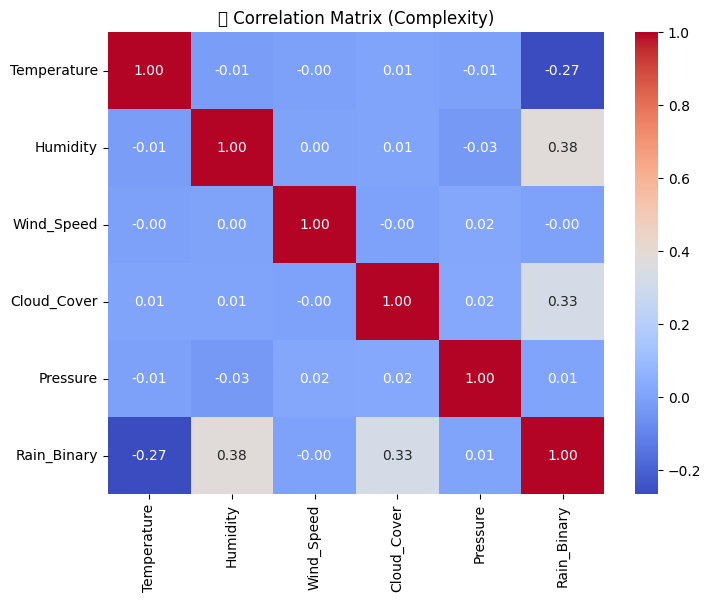

In [ ]:
# Visualizing correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("📊 Correlation Matrix (Complexity)")
plt.show()


📊 Variety: Box plots of features vs Rain



<ipython-input-19-f79763d852f0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rain', y=feature, data=df, palette='Set3')


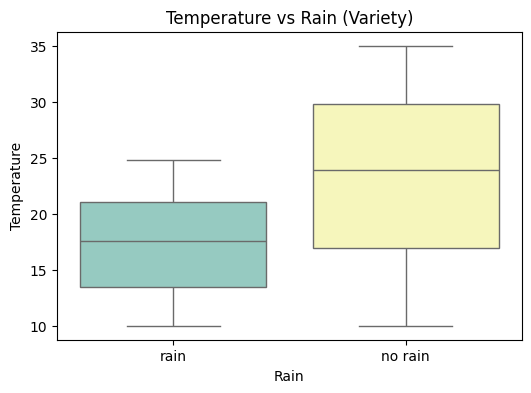

<ipython-input-19-f79763d852f0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rain', y=feature, data=df, palette='Set3')


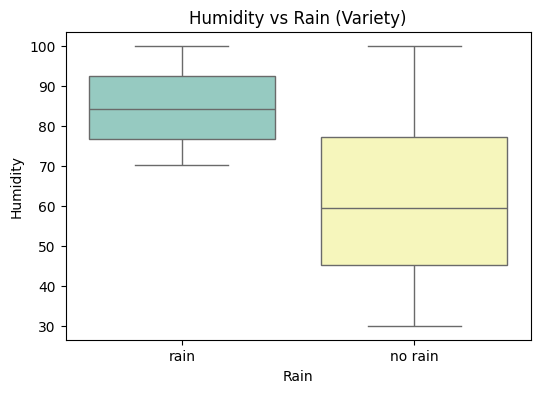

<ipython-input-19-f79763d852f0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rain', y=feature, data=df, palette='Set3')


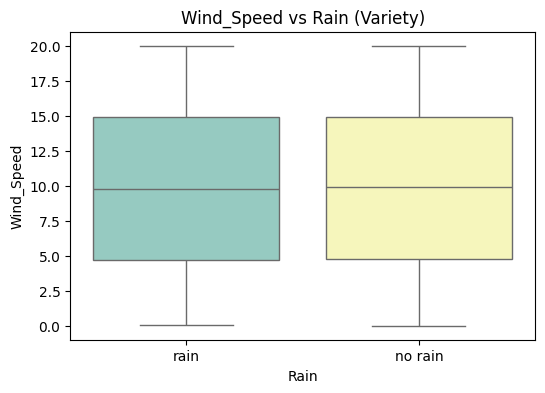

<ipython-input-19-f79763d852f0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rain', y=feature, data=df, palette='Set3')


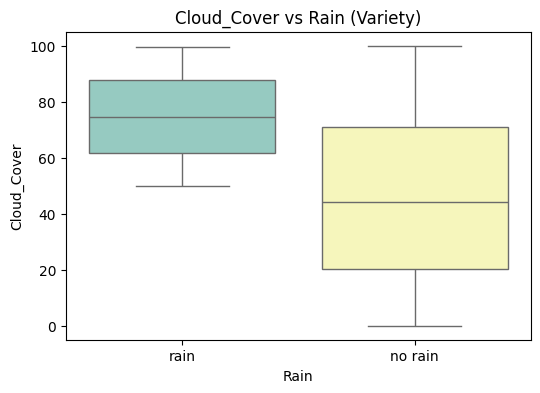

<ipython-input-19-f79763d852f0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rain', y=feature, data=df, palette='Set3')


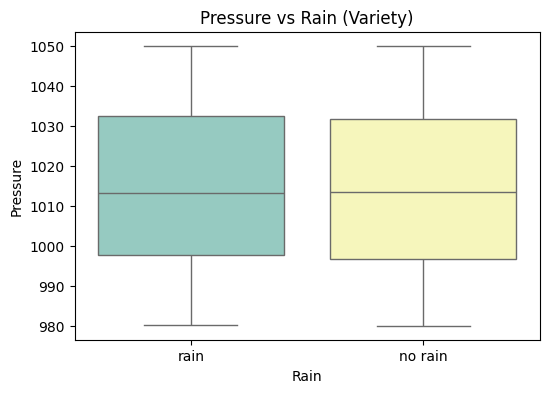

In [ ]:
# 2. H – Heterogeneity (Variety): We simulate this by visualizing multiple feature types
print("\n📊 Variety: Box plots of features vs Rain\n")
features = ['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Rain', y=feature, data=df, palette='Set3')
    plt.title(f'{feature} vs Rain (Variety)')
    plt.show()


In [ ]:
# 3. A – Accuracy (Veracity): Check for missing or inconsistent data
print("\n✅ Veracity: Checking for missing values and outliers\n")
print(df.isnull().sum())



✅ Veracity: Checking for missing values and outliers

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
Rain_Binary    0
dtype: int64


In [ ]:
# Optional: Handle missing data (if any)
# df = df.dropna()

# 4. O – Overload (Volume): Check dataset size and simulate scalability
print("\n📦 Volume: Dataset size and structure\n")
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])


📦 Volume: Dataset size and structure

Rows: 2500
Columns: 7


In [ ]:
# 5. S – Speed (Velocity): Simulate speed by timing processing
import time
start = time.time()

In [ ]:
# Simulate real-time diagnostic: Group by humidity levels and check rain probability
df['Humidity_Level'] = pd.cut(df['Humidity'], bins=4)
rain_prob = df.groupby('Humidity_Level')['Rain_Binary'].mean()

print("\n⏱️ Velocity: Rain probability by Humidity level")
print(rain_prob)

end = time.time()
print(f"⏱️ Processing time: {round(end - start, 2)} seconds")


⏱️ Velocity: Rain probability by Humidity level
Humidity_Level
(29.935, 47.503]    0.000000
(47.503, 65.001]    0.000000
(65.001, 82.499]    0.232026
(82.499, 99.997]    0.290051
Name: Rain_Binary, dtype: float64
⏱️ Processing time: 0.02 seconds


<ipython-input-23-d4c166a3d1b9>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rain_prob = df.groupby('Humidity_Level')['Rain_Binary'].mean()


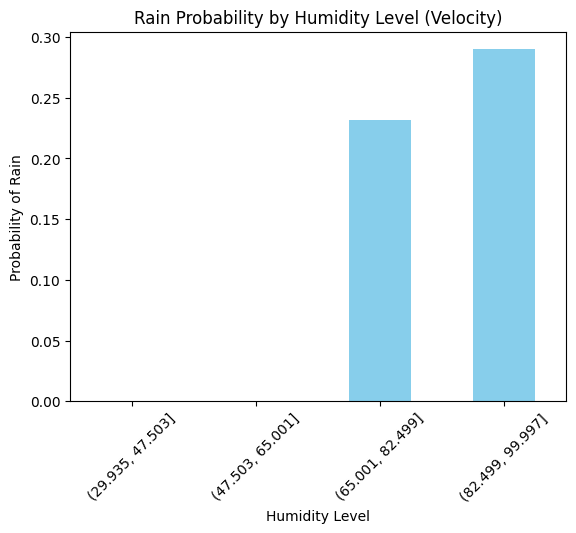

In [ ]:
# Optional plot
rain_prob.plot(kind='bar', color='skyblue')
plt.title("Rain Probability by Humidity Level (Velocity)")
plt.ylabel("Probability of Rain")
plt.xlabel("Humidity Level")
plt.xticks(rotation=45)
plt.show()